In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [15]:
import win32gui
import win32api

In [9]:
flags, hcursor, (x,y) = win32gui.GetCursorInfo()

In [16]:
from win32api import GetSystemMetrics

print("Width =", GetSystemMetrics(0))
print("Height =", GetSystemMetrics(1))

Width = 1536
Height = 864


In [165]:
import time
import itertools
from PIL import Image

def store_mouse_movement(duration = 30,pad = 2):
    width,height = GetSystemMetrics(0),GetSystemMetrics(1)
    capture = np.zeros((width,height))
    
    s = time.time()
    i = 1
    
    x_range = lambda x : list(range(max([0,x-pad]),min([width,x+pad])))
    y_range = lambda y : list(range(max([0,y-pad]),min([height,y+pad])))
    arr_range = lambda x,y : np.array(list(itertools.product(x_range(x),y_range(y))))
    
    while time.time() - s < duration:
        _, _, (x,y) = win32gui.GetCursorInfo()
        arr = arr_range(x,y)
        capture[arr[:,0],arr[:,1]] = 1
        i += 1
        
        
        
    return capture,i

In [166]:
c,i = store_mouse_movement(duration = 3,pad = 10)

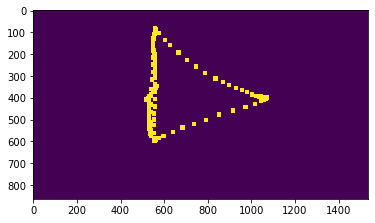

In [167]:
plt.imshow(c.T)
plt.show()